In [1]:
%config InlineBackend.figure_format = 'svg'

# Phase space:  The harmonic oscillator
---
***


The phase space is a useful representation of the solutions where you can discover new behaviors for your system. Instead of focusing on the time, you focus on the relationships between state variables. For instance, if you have both the position and the velocity as functions of time for a given system, then you plot the velocity as function of the position. The orbits in this space will depend on the initial conditions, but will give a general idea of the system dynamics.

An harmonic oscillator is described by the differential equation
\begin{equation}
\ddot x + \omega^2 x = 0
\end{equation}
where $x$ is the state variable and $\omega$ is called the frequency of the oscillar. Several examples of harmonic oscillators occur in nature: a mass attached to a spring (where $\omega = \sqrt{k/m}$), a simple pendulum under small amplitudes ($\omega = \sqrt{g/l}$), an RL circuit, and so on. 

The solution for this kind of equations as of oscillatory nature, and can be generally written as
$$
x = A\cos(\omega t + \delta),
$$
where $A$ is the amplitude and $\delta$ is the phase constant. 

> **Exercise**: Verify that the previous expression is indeed a solution by substituting it into the differential equation.

The kind of systems fullfiling this behaviour conserves the so-called mechanical energy, defined as the sum of the kinetic ($K = mv^2/2$) and potential ($U = kx^2/2$, for the mass-spring system) energies.

In the following we will use the harmonic oscillator example as the case of study in order to explore some concepts of dynamical systems.

## Numerical solution
Although we already have the full theoretical solution, we will solve the differential equation numerically in order to callibrate our procedure and then move to non-linear systems where there is no close solution.

We will use scipy to solve the differential equation. This requires to rewrite the previous linear-second-order differential equation as a set of linear-first order differential equations. This is very easy by introducing the velocity $v = \dot x$ as a second state variable:

\begin{align}
\dot x &= v,\\
\dot v &= -\omega^2 x.
\end{align}

As you can see, we have created a coupled system of differential equations. The geometrical space spanned by the coordinates $(x, v)$ is called the **phase space** of the system (actually it is generated by $(x, p)$, where $p = mv$ is the linear momentum, but there is no important difference since the mass is constant in our problem). 

We will use the submodule ```scipy.integrate.solve_ivp``` method to solve our systems.

> **Exercise**: Check the manual for scipy.integrate.solve_ivp and scipy.integrate.ode 

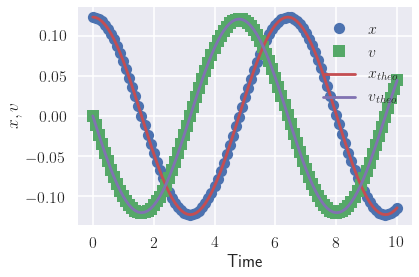

In [35]:
# global imports
import numpy as np
from scipy.integrate import solve_ivp
# For nice figures
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True # Use latex
import seaborn as sns
sns.set()
sns.set_context('poster')

# global parameters
W = 0.98 # angular frequency
T0 = 0.0
TF = 10.0
DT = 0.1
# initial conditions
X0 = 0.123
V0 = 0.0

# function to return the derivatives
def derivatives(t, state): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    xdd = -W*W*state[0]
    return np.array([xd, xdd])

# solving the differential equation
state0 = np.array([X0, V0])
t = np.arange(T0, TF+DT, DT) 
state = solve_ivp(fun=derivatives, t_span=(T0, TF), y0=state0, t_eval=t)

# Plot the solution
fig, ax = plt.subplots()
ax.plot(t, state.y[0], 'o', label=r"$x$")
ax.plot(t, state.y[1], 's', label=r"$v$")
ax.set_xlabel('Time')
ax.set_ylabel(r'$x, v$')
# Theoretical
ax.plot(t, X0*np.cos(W*t), '-', label=r"$x_{theo}$")
ax.plot(t, -X0*W*np.sin(W*t), '-', label=r"$v_{theo}$")

ax.legend()

# Phase plane
Now let's check how the phase plane looks like, for the given initial condition. For that regard, we need to plot $v$ as a function of $x$.

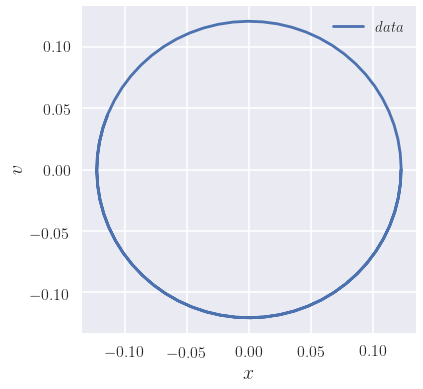

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(state.y[0], state.y[1], '-', label=r"$data$") 
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$v$', fontsize=20)
plt.legend(fontsize=15)

This is expected for the conservation of energy ($E = mv^2/2 + kx^2/2$), which generates ellipses (circles in our case) for an harmonic oscillator. But this trayectory is due only to one specific set of initial conditions. Let's generate another set, solve and plot.

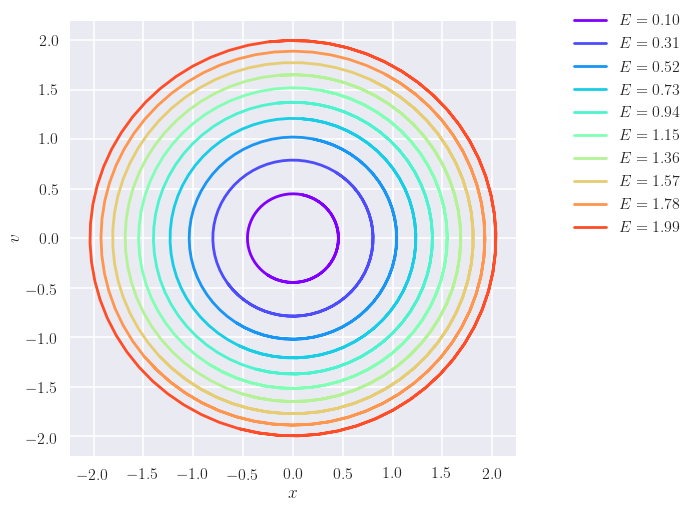

In [2]:
# global imports
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
np.random.seed(0)
# For nice figures
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True # Use latex
import matplotlib.cm as cm # To manage a color map
import seaborn as sns
sns.set()
sns.set_context('poster')

# global parameters
W = 0.98 # angular frequency
T0 = 0.0
TF = 10.0
DT = 0.1

# function to return the derivatives
def derivatives(t, state): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    xdd = -W*W*state[0]
    return np.array([xd, xdd])


fig, ax = plt.subplots(figsize=(8, 8))

NTRY = 10
EMIN = 0.1 # Minimum Energy
EMAX = 1.99 # Maximum Energy
E = np.linspace(EMIN, EMAX, NTRY)
X0 = np.random.uniform(-1.0, 1.0, NTRY)
V0 = np.sqrt(2*E - W*W*X0*X0)
for i in range(0, NTRY) : 
    # solving the differential equation
    state0 = np.array([X0[i], V0[i]]) # Initial conditions for this energy
    # numerical solution
    t = np.arange(T0, TF+DT, DT) 
    state = solve_ivp(fun=derivatives, t_span=(T0, TF), y0=state0, t_eval=t)
    # Plot
    x = state.y[0]
    v = state.y[1]
    ax.plot(x, v, '-', color = cm.rainbow(i*1.0/NTRY), label=r'$E = %.2f$' % (E[i])) 

# end plot
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$v$')
ax.legend(bbox_to_anchor=(1.4, 1.05))

# Exercise : Phase space for non-linear oscillator
Now let's move to a non-linear oscillator, described by the equation
\begin{equation}
\ddot x  + \omega^2 \sin x = 0
\end{equation}
Of course, the solution is not harmonic unless $x$ is very small. How is the phase space now? Adapt the previous solution and analyze.

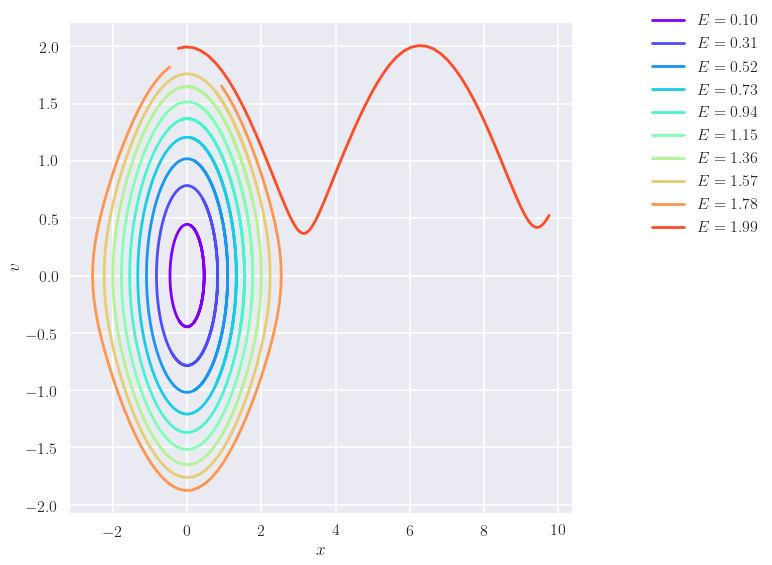

In [3]:
%matplotlib inline
# global imports
import numpy as np
from scipy.integrate import solve_ivp
np.random.seed(0)
# For nice figures
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex']=True # Use latex
import matplotlib.cm as cm # To manage a color map
import seaborn as sns
sns.set()
sns.set_context('poster')

# global parameters
W = 0.98 # angular frequency
T0 = 0.0
TF = 10.0
DT = 0.1

# function to return the derivatives
def derivatives(t, state): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    xdd = -W*W*np.sin(state[0])
    return np.array([xd, xdd])


fig, ax = plt.subplots(figsize=(9, 9))

NTRY = 10
EMIN = 0.1 # Minimum Energy
EMAX = 1.99 # Maximum Energy
E = np.linspace(EMIN, EMAX, NTRY)
X0 = np.random.uniform(-1.0, 1.0, NTRY)
V0 = np.sqrt(2*E - W*W*X0*X0)
for i in range(0, NTRY) : 
    # solving the differential equation
    state0 = np.array([X0[i], V0[i]]) # Initial conditions for this energy
    # numerical solution
    t = np.arange(T0, TF+DT, DT) 
    state = solve_ivp(fun=derivatives, t_span=(T0, TF), y0=state0, t_eval=t)
    # Plot
    x = state.y[0]
    v = state.y[1]
    ax.plot(x, v, '-', color = cm.rainbow(i*1.0/NTRY), label=r'$E = %.2f$' % (E[i])) 

# end plot
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$v$')
ax.legend(bbox_to_anchor=(1.4, 1.05))

These are orbits, in the phase space, which are never touching each other due to the conservation of energy.

# Exercise : Including dissipation

We will now include a viscous dissipation of the form $-b\dot x = -bv$, which will dissipate energy and brings th system into rest. We will use low dissipation. The differential equation is now
\begin{equation}
\ddot x +b\dot x + \omega^2 \sin x = 0.
\end{equation}



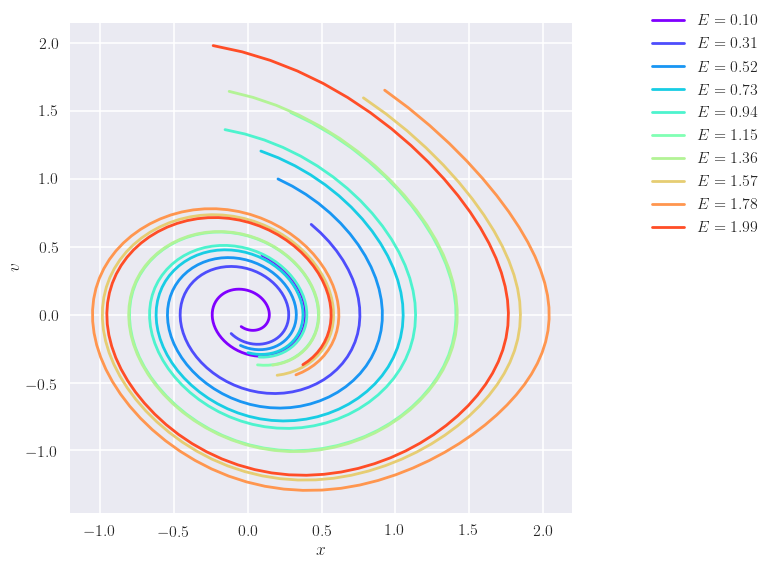

In [90]:
%matplotlib inline
# global imports
import numpy as np
from scipy.integrate import solve_ivp
np.random.seed(0)
# For nice figures
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True # Use latex
import matplotlib.cm as cm # To manage a color map
import seaborn as sns
sns.set()
sns.set_context('poster')

# global parameters
W = 0.98 # angular frequency
B = 0.30 # Dissipation rate
T0 = 0.0
TF = 10.0
DT = 0.1

# function to return the derivatives
def derivatives(t, state): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    xdd = -W*W*np.sin(state[0]) - B*state[1]
    return np.array([xd, xdd])


fig, ax = plt.subplots(figsize=(9, 9))

NTRY = 10
EMIN = 0.1 # Minimum Energy
EMAX = 1.99 # Maximum Energy
E = np.linspace(EMIN, EMAX, NTRY)
X0 = np.random.uniform(-1.0, 1.0, NTRY)
V0 = np.sqrt(2*E - W*W*X0*X0)
for i in range(0, NTRY) : 
    # solving the differential equation
    state0 = np.array([X0[i], V0[i]]) # Initial conditions for this energy
    # numerical solution
    t = np.arange(T0, TF+DT, DT) 
    state = solve_ivp(fun=derivatives, t_span=(T0, TF), y0=state0, t_eval=t)
    # Plot
    x = state.y[0]
    v = state.y[1]
    ax.plot(x, v, '-', color = cm.rainbow(i*1.0/NTRY), label=r'$E = %.2f$' % (E[i])) 

# end plot
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$v$')
ax.legend(bbox_to_anchor=(1.4, 1.05))

As you can see, the orbits are now tilted to null velocity, an effect which increases with $b$

# Exercise : Even more non-linear
Study the same dynamics for the non-linear oscillator described by 
\begin{equation}
\ddot x + \omega^2 x^\lambda = 0,
\end{equation}
with $\lambda$ odd . What is the effect on the phase space trajectories?

# The vectorial phase plane
It would be interesting not only to see the paths in phase space but also the way the solutions are moving (from left to right? from right to left?)). To do this, we are going to use the function `derivatives` as the estimator of the velocity and then plot some arrows in the phase plane. There are two useful functions to do this: `streamplot` and `quiver` . We will use the former.  

**Please note that you are actually NOT solving the ODE!**

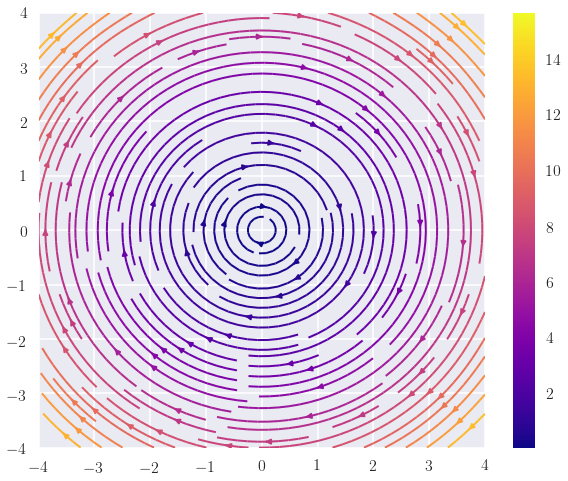

In [10]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('poster')

# global parameters
W = 0.98 # angular frequency

# function to return the derivatives
def derivatives(state, t=0): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    xdd = -W*W*((state[0]))
    #xdd = -W*W*(np.sin(state[0]))
    #xdd = -W*W*((state[0])**3)
    return [xd, xdd]

N = 30
MIN = -4.0
MAX = 4.0
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
DX, DY = derivatives([X, Y])
E = 0.5*X*X + 0.5*W*W*Y*Y

fig = plt.figure(figsize=(10,8))
#ax.quiver(X, Y, DX, DY, M, pivot='mid')
#ax.quiver(X, Y, DX, DY)
plt.streamplot(X, Y, DX, DY, color=E, density=[1.5, 1.5], linewidth=2, cmap='plasma')
plt.colorbar()


# Exercise : Insert dissipation

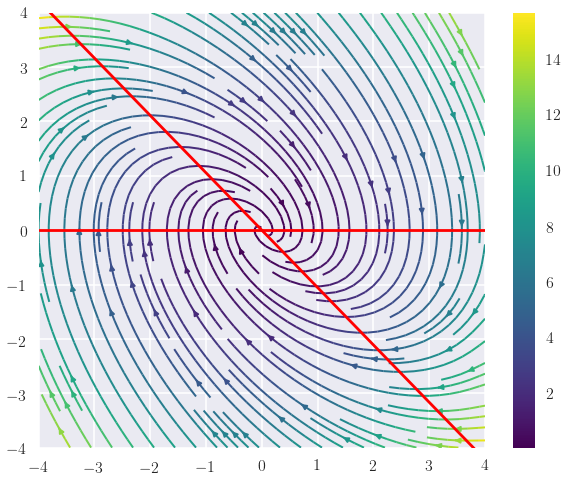

In [12]:
%matplotlib inline
# global imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('poster')

# global parameters
W = 0.98 # angular frequency
B = 0.91

# function to return the derivatives
def derivatives(state, t=0): 
    """
    This function returns the derivatives of the state vector
    state : a vector with the current values of the state variables
    t : time, needed for the odeint solver
    """
    xd  = state[1]
    xdd = -W*W*((state[0])) - B*state[1]
    #xdd = -W*W*(np.sin(state[0]))
    #xdd = -W*W*((state[0])**3)
    return [xd, xdd]

N = 30
MIN = -4.0
MAX = 4.0
X, Y = np.meshgrid(np.linspace(MIN, MAX, N), np.linspace(MIN, MAX, N))
DX, DY = derivatives([X, Y])
E = 0.5*X*X + 0.5*W*W*Y*Y

fig = plt.figure(figsize=(10,8))
#ax.quiver(X, Y, DX, DY, M, pivot='mid')
#ax.quiver(X, Y, DX, DY)
plt.streamplot(X, Y, DX, DY, color=E, density=[1.5, 1.5], linewidth=2, cmap='viridis')
xdata=np.linspace(-4, 4, 100)
plt.plot(xdata, -W*W*xdata/B, color='red')
plt.ylim([-4, 4])
#plt.axvline(x=0.0, color='red')
plt.plot(xdata, np.zeros_like(xdata), color='red')
plt.colorbar()


# Exercise 
Plot the phase space for the exercise previously given when solving systems of ODE. 

# Exercise : Reactors
(Ref Steven Chapra, Applied Numerical Method, 22.18) The reaction $A \to B$ takes place in two reactors in series. The reactors are well mixed but are not at steady state. The unsteady-state mass balance for each stirred tank reactor is shown below:
\begin{align}
\frac{dA_1}{dt} &= \frac{1}{\tau} (A_0 - A_1) - k A_1,\\
\frac{dB_1}{dt} &= -\frac{1}{\tau} B_1 + k A_1,\\
\frac{dA_2}{dt} &= \frac{1}{\tau} (A_1 - A_2) - k A_2,\\
\frac{dB_2}{dt} &= \frac{1}{\tau} (B_1 - B_2) + kA_2.
\end{align}
where $A_0$ is the  concentration of $A$ at the inlet of the first reactor, $A_1$ is the  concentration of A at the outlet of the first reactor (and inlet of the second), $A_2$ is the concentration of $A$ at the outlet of the second reactor, $B_1$ is the concentration of $B$ at the outlet of the first reactor (and inlet of the second), $B_2$ is the concentration of $B$ in the second reactor, $\tau$ is the residence time for each reactor, and $k$ is the rate constant for reaction of $A$ to produce $B$. If $A_0$ is equal to 20, find the concentrations of $A$ and $B$ in both reactors during their first 10 minutes of operation. Use $k = 0.12$/min and $\tau = 5$ min and assume that the initial conditions of all the dependent variables are zero.

# Exercise : Epidemics
(Ref Steven Chapra, Applied Numerical Method, 23.2) 
The following ODEs have been proposed as a model of an epidemic:
\begin{align}
\frac{dS}{dt} &= -aSI,\\
\frac{dI}{dt} &= aSI -rI,\\
\frac{dR}{dt} &= rI,
\end{align}
where $S =$ the susceptible individuals, $I = $ the infected, $R =$ the recovered, $a =$ the infection rate, and $r =$ the recovery rate. A city has 10,000 people, all of whom are susceptible.
* If a single infectious individual enters the city at t = 0, compute the progression of the epidemic until the number of infected individuals falls below 10. Use the following parameters: $a = 0.002/$(person * week) and $r = 0.15/$d. Develop time-series plots of all the state variables. Also generate a phase-plane plot of $S$ versus $I$ versus $R$.
* Plot the streamplot of $S$ vs. $I$, $S$ vs $R$, and $I$ vs $R$.
* Suppose that after recovery, there is a loss of immunity that causes recovered individuals to become susceptible. This reinfection mechanism can be computed as $\rho R$, where $\rho$ = the reinfection rate. Modify the model to include this mechanism and repeat the computations in a. using $\rho = 0.03/$d. Plot again the streamplot and compare with the previous one.

# EXTRA : Chaos in the non-linear driven pendulum

As a final example of a chaotic system, we will explore the dynamics of the non-linear driven damped oscillator, described by 

\begin{equation}
\frac{d^2\theta}{dt^2} = -\frac{g}{l} \sin\theta - q\frac{d\theta}{dt} + F_D \sin(\Omega_D t).
\end{equation}
Of course, you need you transform this second order equation into a coupled system of two first order equations. Let's explore the dynamics as function of the force amplitud $F_D$, while fixing the remaining parameters to $q = 1/2, l = g = 9.8, \Omega_D = 2/3, \theta_0 = 0.2, \omega_0 = 0$. A typical time series from this system is 

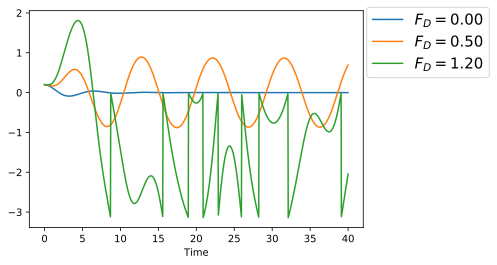

In [33]:
# global imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
Q = 1.0/2.0
G = 9.8
L = 9.8
WD = 2.0/3.0

# initial conditions
X0 = 0.2
V0 = 0.0

# function to return the derivatives
def derivatives(state, t, FD): 
    xd  = state[1]
    yd = -G*np.sin(state[0])/L - Q*state[1] + FD*np.sin(WD*t)
    return xd, yd

# solving the differential equation
state0 = np.array([X0, V0])
t = np.linspace(0, 40, 1000) # dt = 0.1

for FD in [0.0, 0.5, 1.2] :
    state = odeint(derivatives, state0, t, (FD,))
    # Plot the solution
    plt.plot(t, np.fmod(state[:,0], np.pi), '-', label=r"$F_D = %.2f$"%(FD))
    
plt.xlabel('Time')
#plt.ylabel('$x, v$', fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.4, 1.05))

## Sensitivity to initial conditions
For $F_D = 1.2$, we can check if two nearby trajectories diverge (exponentially), which is a signature of chaos

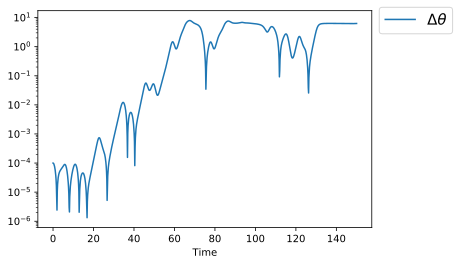

In [34]:
# global imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# global parameters
Q = 1.0/2.0
G = 9.8
L = 9.8
WD = 2.0/3.0

# initial conditions
V0 = 0.0

# function to return the derivatives
def derivatives(state, t, FD): 
    xd  = state[1]
    yd = -G*np.sin(state[0])/L - Q*state[1] + FD*np.sin(WD*t)
    return xd, yd

# solving the differential equation
t = np.linspace(0, 150, 1000) # dt = 0.01

FD = 1.2
X0 = 0.2
state0 = np.array([X0, V0])
state1 = odeint(derivatives, state0, t, (FD,))
X0 = 0.2001
state0 = np.array([X0, V0])
state2 = odeint(derivatives, state0, t, (FD,))
    
# Plot the difference
plt.plot(t, np.abs(state1[:,0] - state2[:, 0]), '-', label=r"$\Delta \theta$")
plt.yscale("log")

plt.xlabel('Time')
#plt.ylabel('$x, v$', fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.05))

As you can see, there is an exponential grow on the difference of the two trajectories, which is a signature of chaos. (The exponential behaviour is at the beginning if the curve, since its trend is linear in a semilog plot). This also shows that the Lyapunov exponent is larger than zero.

## Phase portrait

Let's compare the phase portrait for $F_D = 0.5$ and $F_D = 1.2$

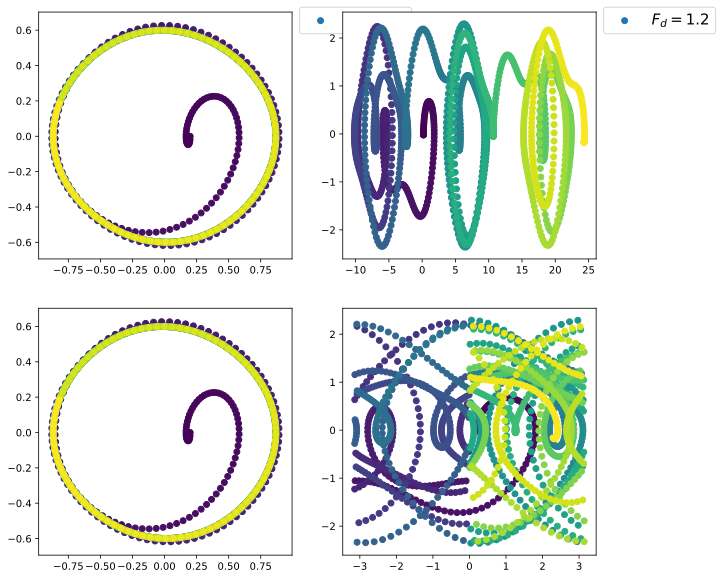

In [35]:
# global imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm

# global parameters
Q = 1.0/2.0
G = 9.8
L = 9.8
WD = 2.0/3.0

# initial conditions
V0 = 0.0
X0 = 0.2

# function to return the derivatives
def derivatives(state, t, FD): 
    xd  = state[1]
    yd = -G*np.sin(state[0])/L - Q*state[1] + FD*np.sin(WD*t)
    return xd, yd

# solving the differential equation
t = np.arange(0, 150, 0.1) # dt = 0.1

FD = 0.5
state0 = np.array([X0, V0])
state1 = odeint(derivatives, state0, t, (FD,))
FD = 1.2
state0 = np.array([X0, V0])
state2 = odeint(derivatives, state0, t, (FD,))
    
# Plot the phase portrait
fig, axes = plt.subplots(2, 2, figsize=(10, 10) )
axes[0, 0].scatter(state1[:,0], state1[:,1], c=t, label=r"$F_d = 0.5$")
axes[1, 0].scatter(np.fmod(state1[:,0], np.pi), state1[:,1], c=t, label=r"$F_d = 0.5$")
axes[0, 1].scatter(state2[:,0], state2[:,1], c=t, label=r"$F_d = 1.2$")
axes[1, 1].scatter(np.fmod(state2[:,0], np.pi), state2[:,1], c=t, label=r"$F_d = 1.2$")

axes[0, 0].legend(fontsize=15, bbox_to_anchor=(1.0, 1.05))
axes[0, 1].legend(fontsize=15, bbox_to_anchor=(1.0, 1.05))

> **Exercise:** Compute the bifurcation diagram.